In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# **8:2**

In [42]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("ETH.csv")
df1 = df.reset_index()['Close']
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1899    2928.701904
1900    2949.359619
1901    2881.157959
1902    3037.056641
1903    2945.131104
Name: Close, Length: 1904, dtype: float64

In [43]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (1523, 1)
Test shape: (381, 1)


In [45]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [46]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 29ms/step - loss: 0.0169 - val_loss: 0.0028
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 9.0840e-04
Epoch 3/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0012 - val_loss: 7.9422e-04
Epoch 4/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0011 - val_loss: 8.3282e-04
Epoch 5/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 7.4396e-04
Epoch 6/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 6.6534e-04
Epoch 7/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 7.1942e-04
Epoch 8/100
23/23 [==============================] - 0s 21ms/step - loss: 9.8029e-04 - val_loss: 7.2083e-04
Epoch 9/100
23/23 [==============================] - 0s 19ms/step - loss: 9.5135e-04 - val_loss: 6.5100e-04
Epoch 10/100
23/23 [==============================] - 0s 17m

In [50]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


9/9 [==============================] - 0s 5ms/step


In [51]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [52]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)


test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 83.6430649356067
Testing MAPE: 2.2577017425601356
Testing MAE: 57.63730600418531


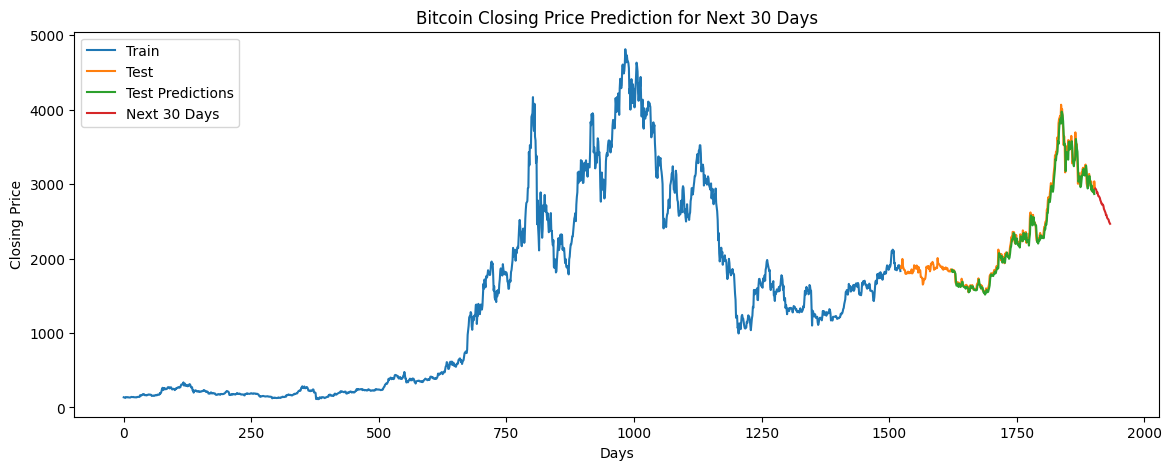

Predicted closing prices for the next 30 days:
[2941.4695 2933.2495 2919.187  2879.0493 2892.9438 2865.7856 2839.1692
 2837.5068 2826.579  2812.67   2780.9868 2767.29   2738.4019 2739.2542
 2718.6553 2724.7427 2705.0618 2665.0454 2650.1155 2632.6072 2615.2031
 2585.152  2585.5146 2552.1965 2537.7688 2531.5278 2522.616  2494.7996
 2479.356  2467.0632]


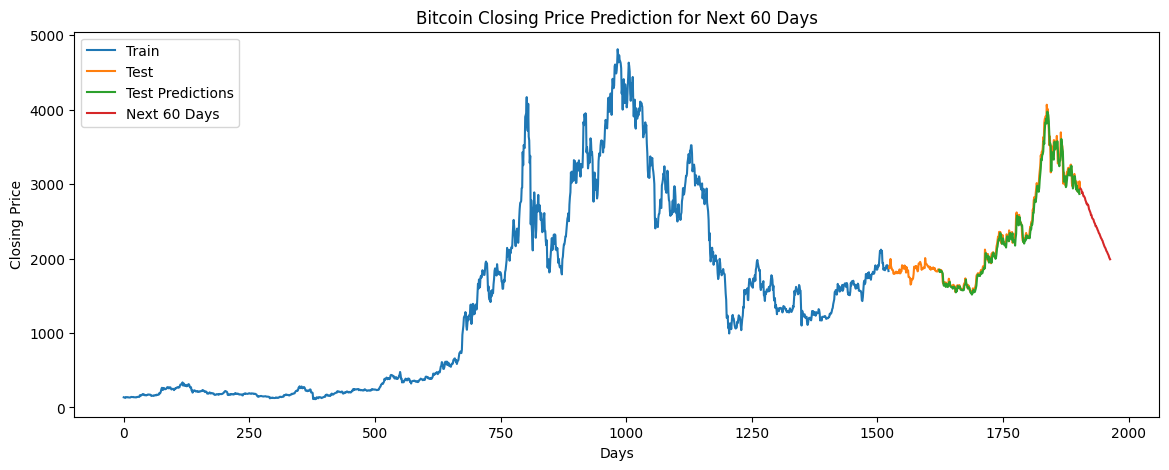

Predicted closing prices for the next 60 days:
[2941.4695 2933.2495 2919.187  2879.0493 2892.9438 2865.7856 2839.1692
 2837.5068 2826.579  2812.67   2780.9868 2767.29   2738.4019 2739.2542
 2718.6553 2724.7427 2705.0618 2665.0454 2650.1155 2632.6072 2615.2031
 2585.152  2585.5146 2552.1965 2537.7688 2531.5278 2522.616  2494.7996
 2479.356  2467.0632 2436.7756 2438.353  2420.1638 2410.9358 2387.4158
 2376.516  2355.0566 2337.7454 2331.223  2310.5474 2293.1184 2275.4353
 2265.8877 2248.8564 2239.0876 2215.3364 2197.0889 2178.2432 2159.389
 2148.9993 2134.8972 2115.6636 2098.4888 2089.4434 2071.7275 2057.271
 2043.3839 2020.4531 2003.1047 1990.5153]


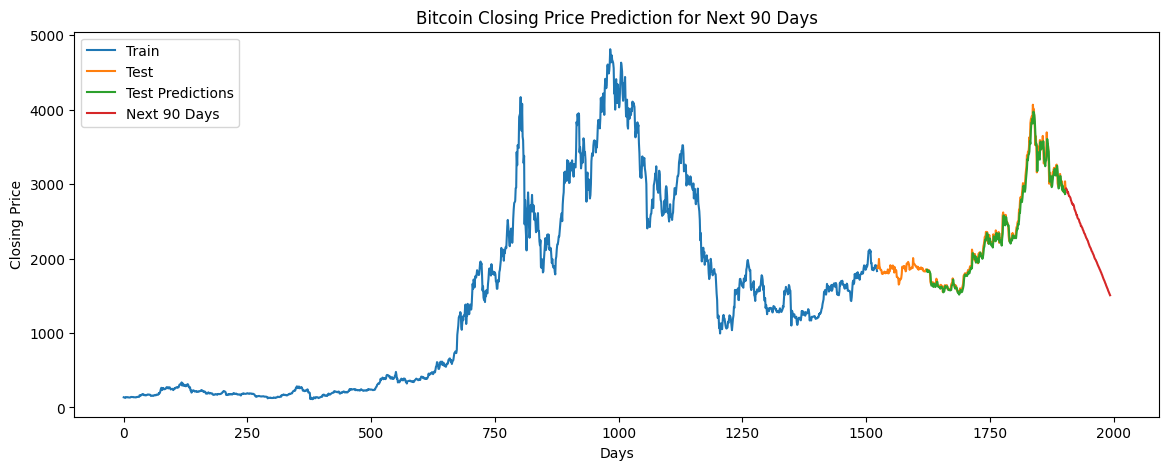

Predicted closing prices for the next 90 days:
[2941.4695 2933.2495 2919.187  2879.0493 2892.9438 2865.7856 2839.1692
 2837.5068 2826.579  2812.67   2780.9868 2767.29   2738.4019 2739.2542
 2718.6553 2724.7427 2705.0618 2665.0454 2650.1155 2632.6072 2615.2031
 2585.152  2585.5146 2552.1965 2537.7688 2531.5278 2522.616  2494.7996
 2479.356  2467.0632 2436.7756 2438.353  2420.1638 2410.9358 2387.4158
 2376.516  2355.0566 2337.7454 2331.223  2310.5474 2293.1184 2275.4353
 2265.8877 2248.8564 2239.0876 2215.3364 2197.0889 2178.2432 2159.389
 2148.9993 2134.8972 2115.6636 2098.4888 2089.4434 2071.7275 2057.271
 2043.3839 2020.4531 2003.1047 1990.5153 1981.823  1965.0151 1952.5928
 1933.8633 1916.382  1901.526  1886.9197 1872.7704 1855.732  1843.7238
 1825.0286 1811.8542 1792.9104 1778.4172 1758.3674 1740.5265 1722.9617
 1708.6464 1693.5347 1674.0023 1659.7699 1639.3442 1623.5586 1606.3872
 1592.2388 1571.0698 1555.6871 1539.7303 1522.6632 1507.3667]


In [53]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [54]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("ETH.csv")
df1 = df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229981,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1899,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395
1900,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795
1901,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140
1902,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956


In [55]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (1332, 1)
Test shape: (572, 1)


In [57]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [61]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 31ms/step - loss: 0.0108 - val_loss: 0.0018
Epoch 2/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 3.5559e-04
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 6.9958e-04 - val_loss: 3.4913e-04
Epoch 4/100
20/20 [==============================] - 0s 20ms/step - loss: 6.3108e-04 - val_loss: 2.8452e-04
Epoch 5/100
20/20 [==============================] - 0s 19ms/step - loss: 6.2681e-04 - val_loss: 2.9655e-04
Epoch 6/100
20/20 [==============================] - 0s 18ms/step - loss: 6.0161e-04 - val_loss: 3.1855e-04
Epoch 7/100
20/20 [==============================] - 0s 21ms/step - loss: 5.5913e-04 - val_loss: 2.9423e-04
Epoch 8/100
20/20 [==============================] - 0s 20ms/step - loss: 5.3213e-04 - val_loss: 2.6140e-04
Epoch 9/100
20/20 [==============================] - 0s 22ms/step - loss: 5.2435e-04 - val_loss: 4.3476e-04
Epoch 10/100
20/20 [====================

In [62]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 5ms/step


In [63]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )

In [64]:
# 12. Đánh giá độ chính xác thuật toán

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 67.774493680291
Testing MAPE: 2.046008291205158
Testing MAE: 45.779194247843684


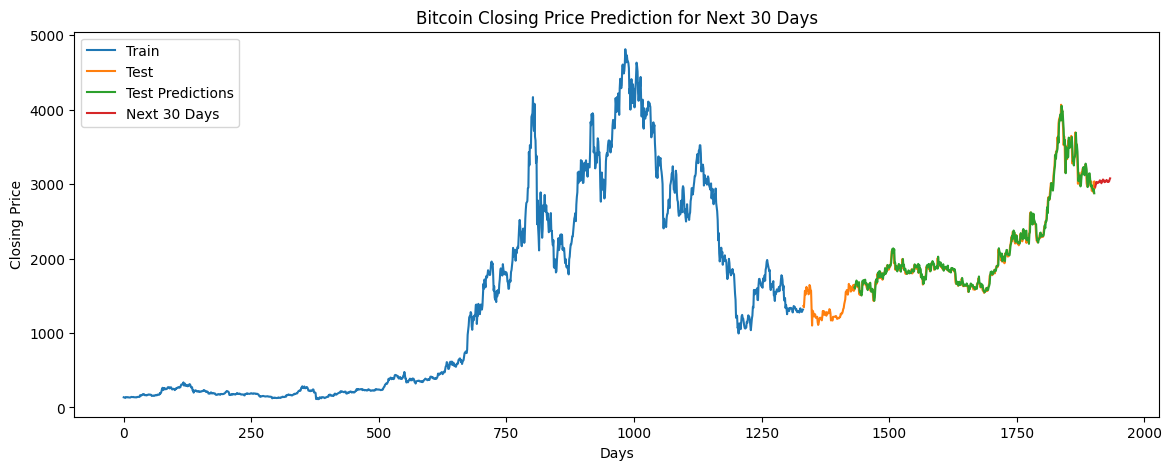

Predicted closing prices for the next 30 days:
[2964.7888 2993.7627 3028.5232 3010.989  3022.9023 3015.8123 3021.6565
 3023.1956 3036.415  3051.4421 3028.224  3031.7698 3011.958  3039.127
 3041.2446 3061.787  3057.7786 3042.7576 3026.175  3040.0898 3035.697
 3041.0005 3056.0562 3048.1902 3028.8674 3033.5105 3030.064  3036.4648
 3060.6643 3077.2422]


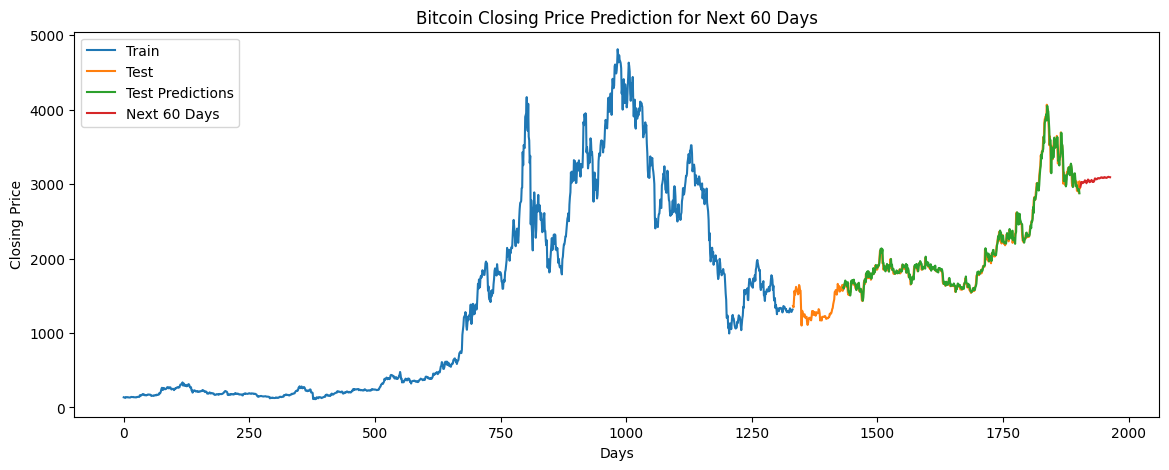

Predicted closing prices for the next 60 days:
[2964.7888 2993.7627 3028.5232 3010.989  3022.9023 3015.8123 3021.6565
 3023.1956 3036.415  3051.4421 3028.224  3031.7698 3011.958  3039.127
 3041.2446 3061.787  3057.7786 3042.7576 3026.175  3040.0898 3035.697
 3041.0005 3056.0562 3048.1902 3028.8674 3033.5105 3030.064  3036.4648
 3060.6643 3077.2422 3065.8457 3070.0125 3064.7402 3066.9539 3076.8027
 3080.695  3080.496  3075.7346 3077.1438 3080.5376 3083.6614 3090.6294
 3091.3823 3086.2268 3087.307  3081.5908 3087.405  3087.2864 3094.4834
 3090.1326 3089.6782 3083.6816 3083.6685 3088.0593 3091.545  3097.7224
 3097.6248 3094.531  3093.3755 3092.626 ]


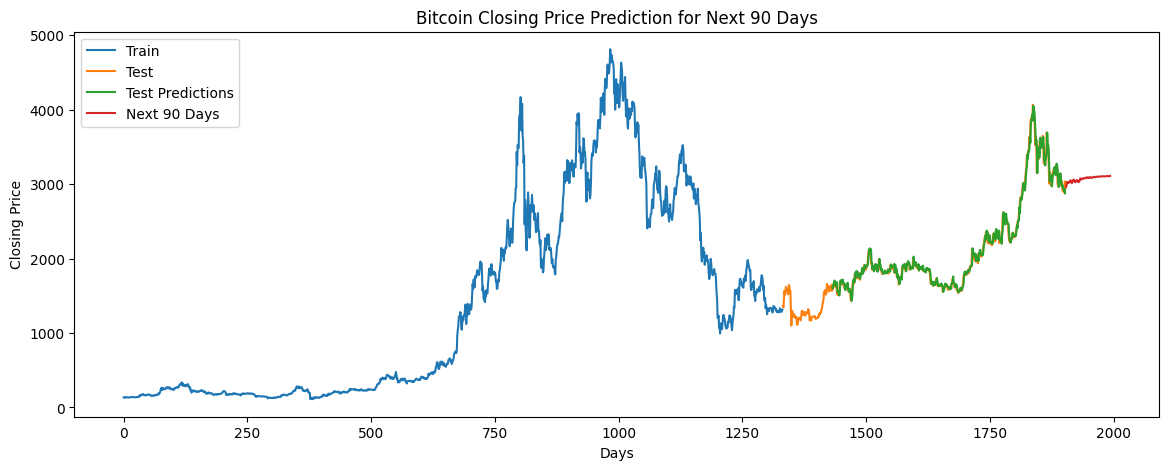

Predicted closing prices for the next 90 days:
[2964.7888 2993.7627 3028.5232 3010.989  3022.9023 3015.8123 3021.6565
 3023.1956 3036.415  3051.4421 3028.224  3031.7698 3011.958  3039.127
 3041.2446 3061.787  3057.7786 3042.7576 3026.175  3040.0898 3035.697
 3041.0005 3056.0562 3048.1902 3028.8674 3033.5105 3030.064  3036.4648
 3060.6643 3077.2422 3065.8457 3070.0125 3064.7402 3066.9539 3076.8027
 3080.695  3080.496  3075.7346 3077.1438 3080.5376 3083.6614 3090.6294
 3091.3823 3086.2268 3087.307  3081.5908 3087.405  3087.2864 3094.4834
 3090.1326 3089.6782 3083.6816 3083.6685 3088.0593 3091.545  3097.7224
 3097.6248 3094.531  3093.3755 3092.626  3094.682  3099.5305 3099.6428
 3101.093  3099.3457 3098.021  3099.5613 3100.8005 3100.472  3103.6
 3103.7349 3101.73   3103.7847 3103.5037 3103.8652 3105.616  3105.1694
 3104.165  3103.668  3104.0527 3104.8083 3106.5557 3107.093  3108.5046
 3107.0674 3105.7102 3106.2656 3106.4912 3108.713  3110.9333]


In [65]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [66]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("ETH.csv")
df1 = df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229981,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1899,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395
1900,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795
1901,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140
1902,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956


In [67]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [69]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [73]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 35ms/step - loss: 0.0035 - val_loss: 6.7980e-04
Epoch 2/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 6.0349e-04
Epoch 3/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - val_loss: 5.3654e-04
Epoch 4/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 4.7024e-04
Epoch 5/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 5.5280e-04
Epoch 6/100
17/17 [==============================] - 0s 21ms/step - loss: 9.2038e-04 - val_loss: 7.4132e-04
Epoch 7/100
17/17 [==============================] - 0s 21ms/step - loss: 9.4663e-04 - val_loss: 6.0694e-04
Epoch 8/100
17/17 [==============================] - 0s 23ms/step - loss: 8.0928e-04 - val_loss: 3.8932e-04
Epoch 9/100
17/17 [==============================] - 0s 21ms/step - loss: 7.6908e-04 - val_loss: 3.8061e-04
Epoch 10/100
17/17 [============================

In [74]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 6ms/step


In [75]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )

In [78]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 78.6333254011497
Testing MAPE: 3.0326051554002924
Testing MAE: 58.49629025684336


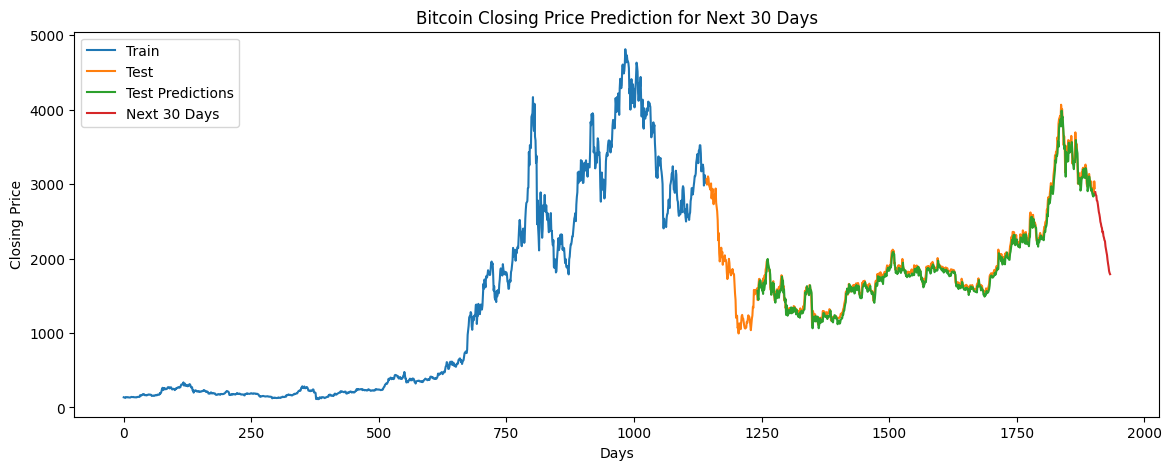

Predicted closing prices for the next 30 days:
[2892.1963 2857.9697 2846.0603 2779.4006 2773.5894 2729.4448 2677.0103
 2624.5732 2595.1858 2553.3914 2494.271  2468.943  2428.899  2411.1477
 2351.6272 2362.1377 2303.4124 2280.013  2246.7715 2233.7434 2162.601
 2124.3184 2083.0994 2046.7374 1981.7407 1932.9541 1890.0999 1833.9723
 1806.3079 1790.1985]


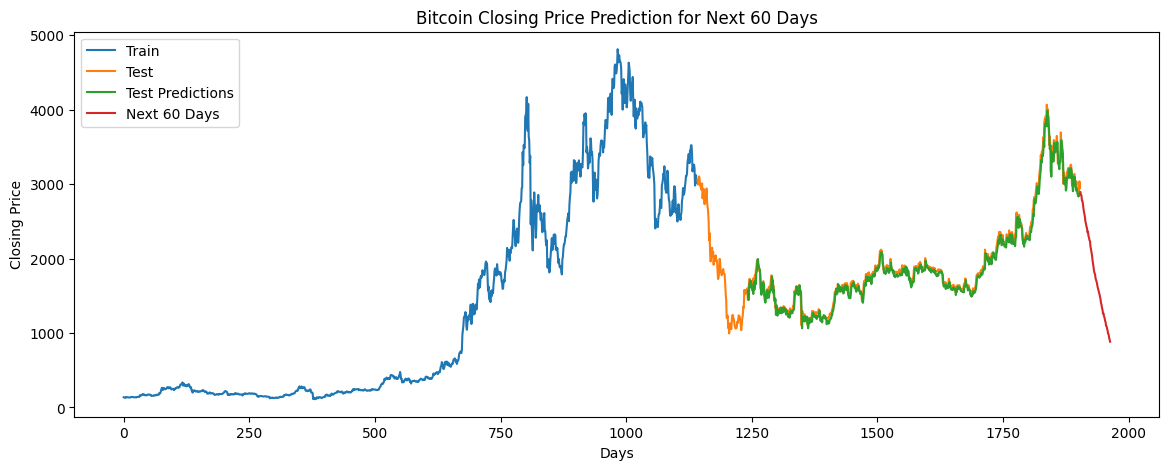

Predicted closing prices for the next 60 days:
[2892.1963  2857.9697  2846.0603  2779.4006  2773.5894  2729.4448
 2677.0103  2624.5732  2595.1858  2553.3914  2494.271   2468.943
 2428.899   2411.1477  2351.6272  2362.1377  2303.4124  2280.013
 2246.7715  2233.7434  2162.601   2124.3184  2083.0994  2046.7374
 1981.7407  1932.9541  1890.0999  1833.9723  1806.3079  1790.1985
 1739.0093  1711.9685  1693.7788  1665.8801  1625.134   1597.6965
 1568.3142  1544.8636  1517.459   1484.4191  1452.6947  1399.969
 1377.4949  1335.6758  1308.3651  1260.4971  1263.3447  1221.079
 1206.371   1162.9886  1150.7028  1097.312   1091.368   1058.9045
 1035.216    993.30145  981.8014   944.17896  912.67773  882.90784]


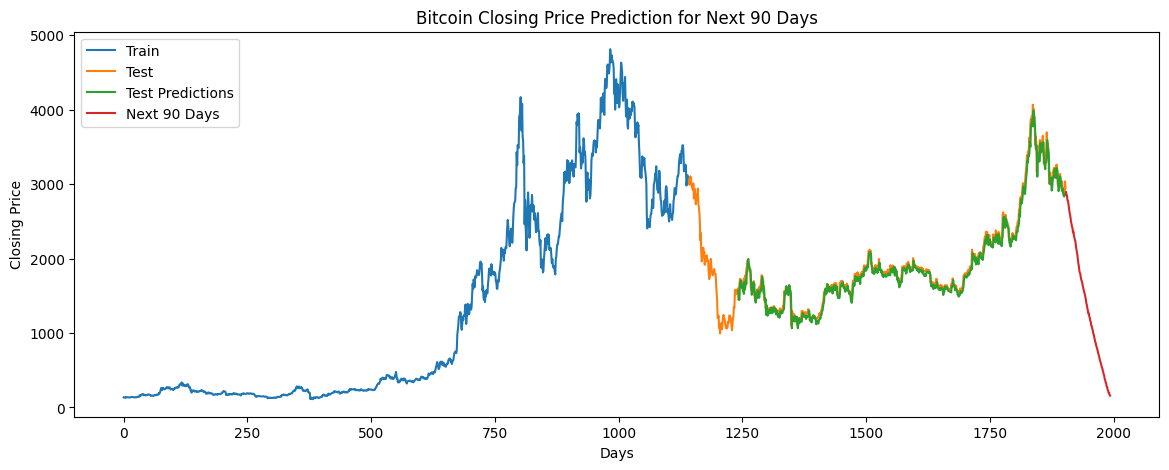

Predicted closing prices for the next 90 days:
[2892.1963  2857.9697  2846.0603  2779.4006  2773.5894  2729.4448
 2677.0103  2624.5732  2595.1858  2553.3914  2494.271   2468.943
 2428.899   2411.1477  2351.6272  2362.1377  2303.4124  2280.013
 2246.7715  2233.7434  2162.601   2124.3184  2083.0994  2046.7374
 1981.7407  1932.9541  1890.0999  1833.9723  1806.3079  1790.1985
 1739.0093  1711.9685  1693.7788  1665.8801  1625.134   1597.6965
 1568.3142  1544.8636  1517.459   1484.4191  1452.6947  1399.969
 1377.4949  1335.6758  1308.3651  1260.4971  1263.3447  1221.079
 1206.371   1162.9886  1150.7028  1097.312   1091.368   1058.9045
 1035.216    993.30145  981.8014   944.17896  912.67773  882.90784
  863.0734   829.2014   809.2801   787.4267   756.5273   726.50916
  707.16077  680.0399   649.283    622.4124   601.61993  578.47107
  548.4115   530.5872   504.93274  480.94223  447.31967  432.26968
  387.90527  370.54147  338.74713  325.7947   281.96246  275.51508
  240.00174  226.69237  197.

In [77]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())